In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-influencing-us-house-prices/US_House_Price.csv


## Importing Machine Learning and Viz Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [29]:
from sklearn.model_selection import train_test_split

## Loading Dataset

In [3]:
df = pd.read_csv('/kaggle/input/factors-influencing-us-house-prices/US_House_Price.csv')

In [4]:
df.head()

,DATE,building_permits,const_price_index,delinquency_rate,GDP,house_for_sale_or_sold,housing_subsidies,income,interest_rate,mortgage_rate,construction_unit,total_houses,total_const_spending,unemployment_rate,urban_population,home_price_index
0,2003-01-01,1808,144.4,1.97,14614.141,76,25.93,10710.4,1.24,5.9160,1654,111278.0,1.5,5.8,79.583,128.461
1,2003-02-01,1854,145.2,1.97,14614.141,82,25.93,10674.0,1.26,5.8425,1688,111278.0,-0.1,5.9,79.583,129.355
2,2003-03-01,1757,145.2,1.97,14614.141,98,25.93,10696.5,1.25,5.7450,1638,111278.0,-1.1,5.9,79.583,130.148
3,2003-04-01,1803,145.9,1.83,14743.567,91,25.93,10752.7,1.26,5.8125,1662,111278.0,1.7,6.0,79.583,130.884
4,2003-05-01,1835,145.8,1.83,14743.567,101,25.93,10832.0,1.26,5.4840,1733,111278.0,0.2,6.1,79.583,131.735


## Preparing Dataset for Supervised ML Model Training 

In [6]:
#Checking Null Values
df.isna().sum()

DATE                      0
building_permits          0
const_price_index         0
delinquency_rate          0
GDP                       0
house_for_sale_or_sold    0
housing_subsidies         0
income                    0
interest_rate             0
mortgage_rate             0
construction_unit         0
total_houses              0
total_const_spending      0
unemployment_rate         0
urban_population          0
home_price_index          0
dtype: int64

In [7]:
#Checking Data Types
df.dtypes

DATE                       object
building_permits            int64
const_price_index         float64
delinquency_rate          float64
GDP                       float64
house_for_sale_or_sold      int64
housing_subsidies         float64
income                    float64
interest_rate             float64
mortgage_rate             float64
construction_unit           int64
total_houses              float64
total_const_spending      float64
unemployment_rate         float64
urban_population          float64
home_price_index          float64
dtype: object

In [8]:
#Converting into datetype
df['DATE'] = df['DATE'].astype('datetime64[ns]')

In [10]:
df.dtypes

DATE                      datetime64[ns]
building_permits                   int64
const_price_index                float64
delinquency_rate                 float64
GDP                              float64
house_for_sale_or_sold             int64
housing_subsidies                float64
income                           float64
interest_rate                    float64
mortgage_rate                    float64
construction_unit                  int64
total_houses                     float64
total_const_spending             float64
unemployment_rate                float64
urban_population                 float64
home_price_index                 float64
dtype: object

In [11]:
df.columns

Index(['DATE', 'building_permits', 'const_price_index', 'delinquency_rate',
       'GDP', 'house_for_sale_or_sold', 'housing_subsidies', 'income',
       'interest_rate', 'mortgage_rate', 'construction_unit', 'total_houses',
       'total_const_spending', 'unemployment_rate', 'urban_population',
       'home_price_index'],
      dtype='object')

In [21]:
x = df.drop(columns=['DATE','home_price_index'])
y = df['home_price_index']

In [54]:
x.shape

(240, 14)

In [22]:
len(df)

240

## Training and Testing Model :  Cross Validation (Supervised Learning)

In [25]:
scores = cross_val_score(LinearRegression(),x,y,cv=10)
scores

array([ -2.24744733,   0.25274413,   0.13563096, -19.44878578,
       -21.09205226,   0.79430896,  -0.74862533,   0.2859331 ,
         0.04134427,   0.61296083])

In [27]:
scores.mean()

-4.141398844333119

In [36]:
scores_5 = cross_val_score(LinearRegression(),x,y,cv=5)
scores_5

array([-0.97931773,  0.15884031, -0.07265137,  0.79094305,  0.43691196])

In [28]:
scores_5.mean()

0.0669452449863454

In [37]:
scores_20 = cross_val_score(LinearRegression(),x,y,cv=20)
scores_20

array([-4.44288834e+00,  3.53088501e-02, -3.58480706e-01, -1.37797771e+01,
       -2.39411542e+00,  4.39213768e-02, -5.17437304e+01, -3.68292630e+00,
       -3.61084752e+01, -4.71512147e+00,  5.23019411e-01,  4.24565000e-01,
       -2.20175798e+00, -3.31631006e+00, -7.40506235e-01, -7.81522076e+00,
       -9.26978154e+00, -1.84436982e-01, -3.75563182e-01, -3.21753657e+00])

In [38]:
scores_20.mean()

-7.165990681692003

## Checking Reason : Getting very low model testing score

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [40]:
model = LinearRegression()

In [41]:
model.fit(x_train,y_train)

LinearRegression()

In [42]:
model.score(x_test,y_test)

0.9878852144167163

In [45]:
model.score(x_train,y_train)

0.9890238206633696

**Observation: Model score on train data and test data is almost same and good, which is 0.98.It implies that model is balanced fit (neither underfit nor overfit).It means model was performing bad prevoulsy because of cross validation.**

## Training and Testing Model :  PCA (Unsupervised Learning)

**Principal compnent analysis is an unspervised (dimensonality reudction) learning method, which keep the data points with maximum variance(most important) and calculate the new principal components.**

In [82]:
# Retain 90% of the information
pca = PCA(0.9)

In [83]:
#We have to scale data before using in PCA
x_scale = pca.fit_transform(x)

In [84]:
x_scale[0]

array([11016.48615017])

In [85]:
x_scale.shape

(240, 1)

**We can see now our new independent variables have only 1 column, comparing to previously 14.**

In [86]:
x_train_scale,x_test_scale,y_train_scale,y_test_scale = train_test_split(x_scale,y,test_size=0.2)

In [87]:
model2 = LinearRegression()

In [88]:
model2.fit(x_train_scale,y_train_scale)

LinearRegression()

In [89]:
model2.score(x_test_scale,y_test_scale)

0.5437341500363881

**We Observed that PCA is not working well here.**

## Checking WHY PCA is not working ?

In [92]:
features_rel = df.corr()
features_rel

,DATE,building_permits,const_price_index,delinquency_rate,GDP,house_for_sale_or_sold,housing_subsidies,income,interest_rate,mortgage_rate,construction_unit,total_houses,total_const_spending,unemployment_rate,urban_population,home_price_index
DATE,1.000000,-0.129232,0.877701,-0.041883,0.976324,-0.370792,0.956154,0.959025,-0.361360,-0.720143,-0.327051,0.994905,0.198580,-0.208319,0.997951,0.742941
building_permits,-0.129232,1.000000,0.019257,-0.875323,0.024326,0.898774,-0.049066,-0.002308,0.460288,0.277873,0.912469,-0.139062,0.251822,-0.596946,-0.098493,0.381115
const_price_index,0.877701,0.019257,1.000000,-0.137499,0.903544,-0.253345,0.929301,0.852999,-0.221350,-0.462025,-0.155879,0.859014,0.087594,-0.269647,0.887220,0.888823
delinquency_rate,-0.041883,-0.875323,-0.137499,1.000000,-0.207767,-0.777171,-0.105088,-0.177342,-0.567909,-0.294565,-0.883472,-0.039734,-0.009754,0.734091,-0.072721,-0.535645
GDP,0.976324,0.024326,0.903544,-0.207767,1.000000,-0.243185,0.945420,0.950751,-0.203934,-0.616564,-0.162686,0.971317,0.177598,-0.385391,0.979199,0.837699
house_for_sale_or_sold,-0.370792,0.898774,-0.253345,-0.777171,-0.243185,1.000000,-0.274603,-0.215879,0.494941,0.397134,0.904837,-0.377435,0.173959,-0.393907,-0.336039,0.122313
housing_subsidies,0.956154,-0.049066,0.929301,-0.105088,0.945420,-0.274603,1.000000,0.952907,-0.319337,-0.627004,-0.230655,0.937864,0.165387,-0.156554,0.964949,0.828885
income,0.959025,-0.002308,0.852999,-0.177342,0.950751,-0.215879,0.952907,1.000000,-0.288197,-0.682199,-0.180940,0.943165,0.187499,-0.195203,0.964562,0.788287
interest_rate,-0.361360,0.460288,-0.221350,-0.567909,-0.203934,0.494941,-0.319337,-0.288197,1.000000,0.711946,0.685797,-0.348477,-0.390472,-0.513716,-0.347749,0.135246
mortgage_rate,-0.720143,0.277873,-0.462025,-0.294565,-0.616564,0.397134,-0.627004,-0.682199,0.711946,1.000000,0.540901,-0.716116,-0.462693,-0.184545,-0.707341,-0.218551


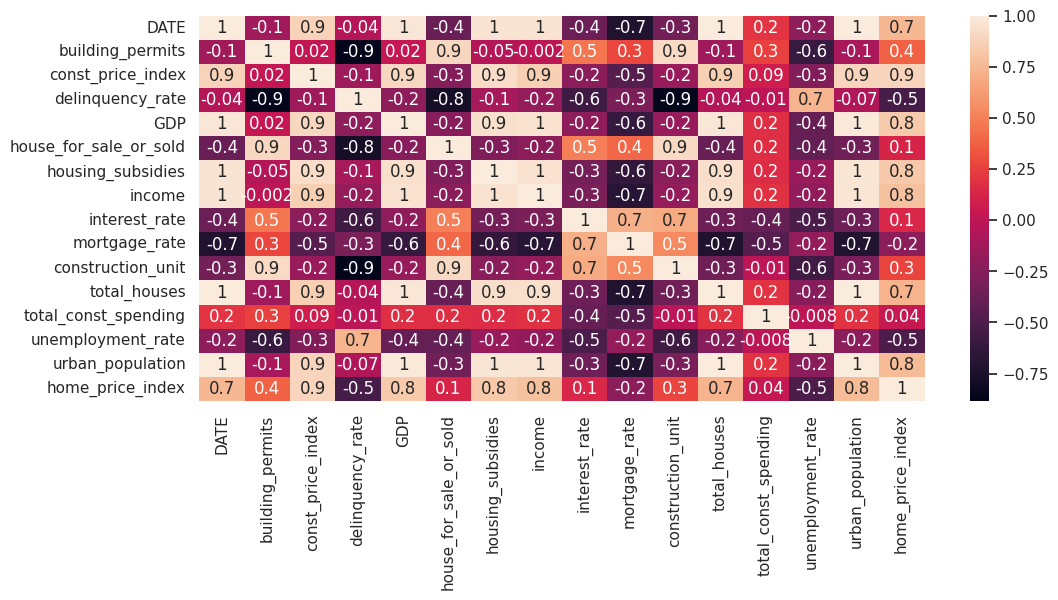

In [95]:
sns.set(rc = {'figure.figsize':(11.7,5)})
sns.heatmap(features_rel,annot=True,fmt='.1g')
plt.show()

**Observation: features like home_price_index, 'urban_population','const_price_index','income','hosuing_subsidies,'GDP' are very much corelated to each other, but many of the fearures are very poorly correlated which makes good sign for using PCA. PCA works very well when features are correlated among themselves.**